In [1]:
import pandas as pd

# Read the data from CSV file
df = pd.read_csv("Monefy.Data.3-15-24.csv")


In [2]:

# Remove negative symbols from the amount column and convert to absolute values
df['amount'] = df['amount'].str.replace(',', '').str.replace('-', '').astype(float)

# Group by category and sum the amount spent
category_total = df.groupby('category')['amount'].sum()



In [3]:
# Print the total amount spent on each category
print("Total amount spent on each category:")
print(category_total)

Total amount spent on each category:
category
Bills               920.0
Car               38475.0
Clothes             600.0
College works     17246.0
Communications      400.0
Deposits           2203.0
Eating out           96.0
Eggs               1150.0
Entertainment      5155.0
Food              25330.0
Friends             350.0
Friends             772.0
Gifts               581.0
Groceries          5006.0
Health            10755.0
House             23604.0
Petrol             1869.0
Sourav              180.0
Sourav              496.0
Sports             1501.0
Toiletry           1676.0
Transport         11047.0
Name: amount, dtype: float64


In [4]:
# Calculate the total amount spent
total_amount = df['amount'].sum()

# Print the total amount spent
print("Total amount spent:", total_amount)

Total amount spent: 149412.0


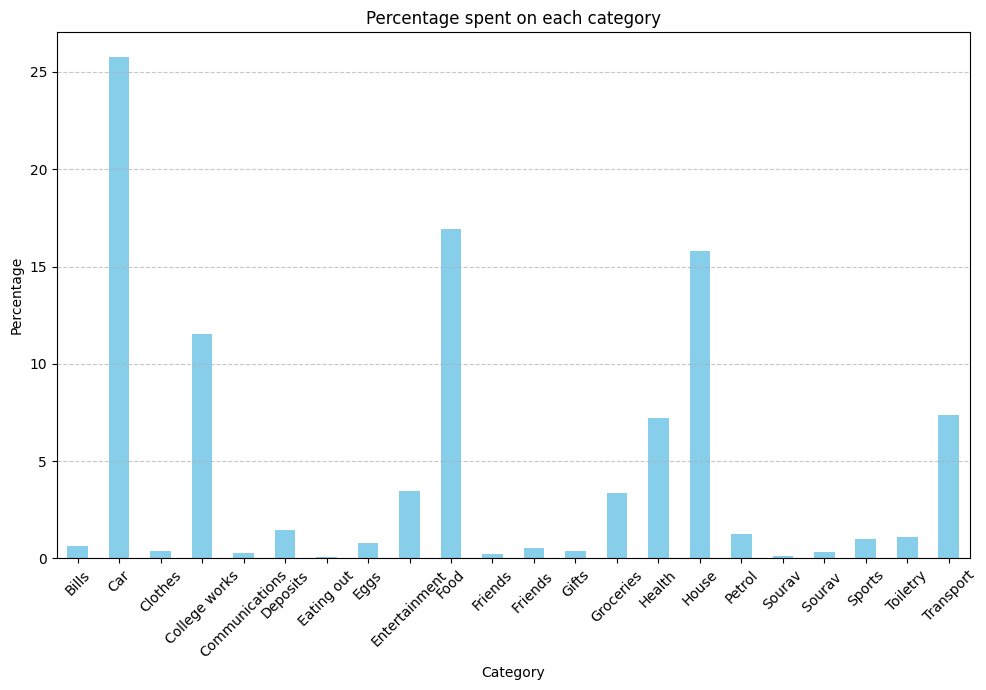

In [12]:
import matplotlib.pyplot as plt

# Group by category and sum the amount spent
category_total = df.groupby('category')['amount'].sum()

# Calculate the percentage spent on each category
category_percentage = (category_total / category_total.sum()) * 100

# Plot the bar graph
plt.figure(figsize=(10, 7))
category_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage spent on each category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Group by month and sum the amount spent
monthly_spending = df.groupby(df['date'].dt.strftime('%Y-%m'))['amount'].sum()

# Print the amount spent in each month
print("Amount spent in each month:")
print(monthly_spending)

Amount spent in each month:
date
2023-10    10712.0
2023-11    35482.0
2023-12    53509.0
2024-01    19736.0
2024-02    19264.0
2024-03    10709.0
Name: amount, dtype: float64


In [14]:
# Get the customer's income
income = float(input("Enter the customer's income: "))

# Calculate overspending each month
overspending_per_month = monthly_spending - income

# Print the overspending each month
print("Overspending each month based on income:")
print(overspending_per_month)

Overspending each month based on income:
date
2023-10     3712.0
2023-11    28482.0
2023-12    46509.0
2024-01    12736.0
2024-02    12264.0
2024-03     3709.0
Name: amount, dtype: float64


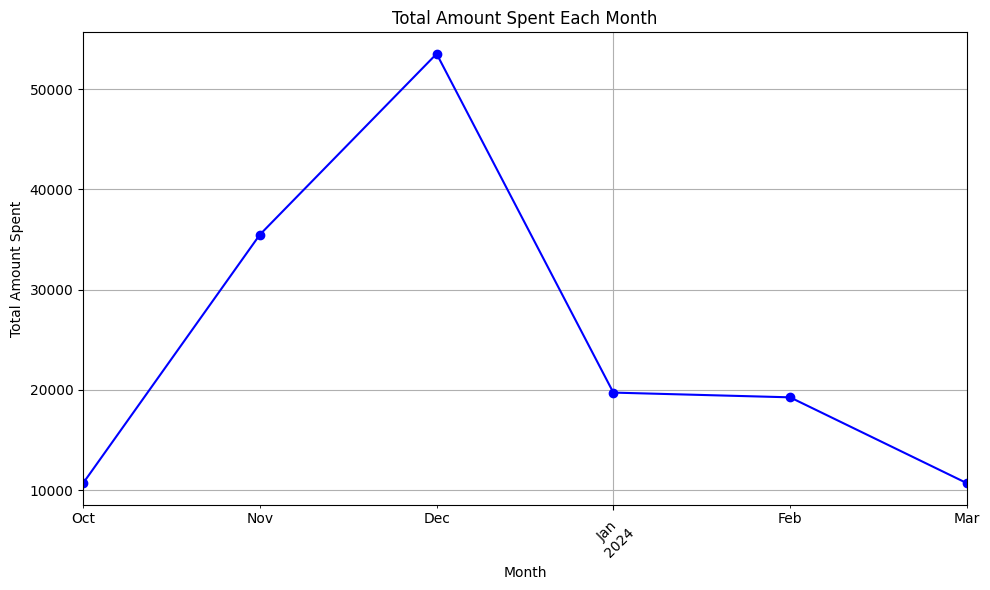

In [16]:
# Extract the month and year from the 'date' column
df['month_year'] = df['date'].dt.to_period('M')

# Group by month and sum the amount spent
monthly_spending = df.groupby('month_year')['amount'].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='line', marker='o', color='b')
plt.title('Total Amount Spent Each Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

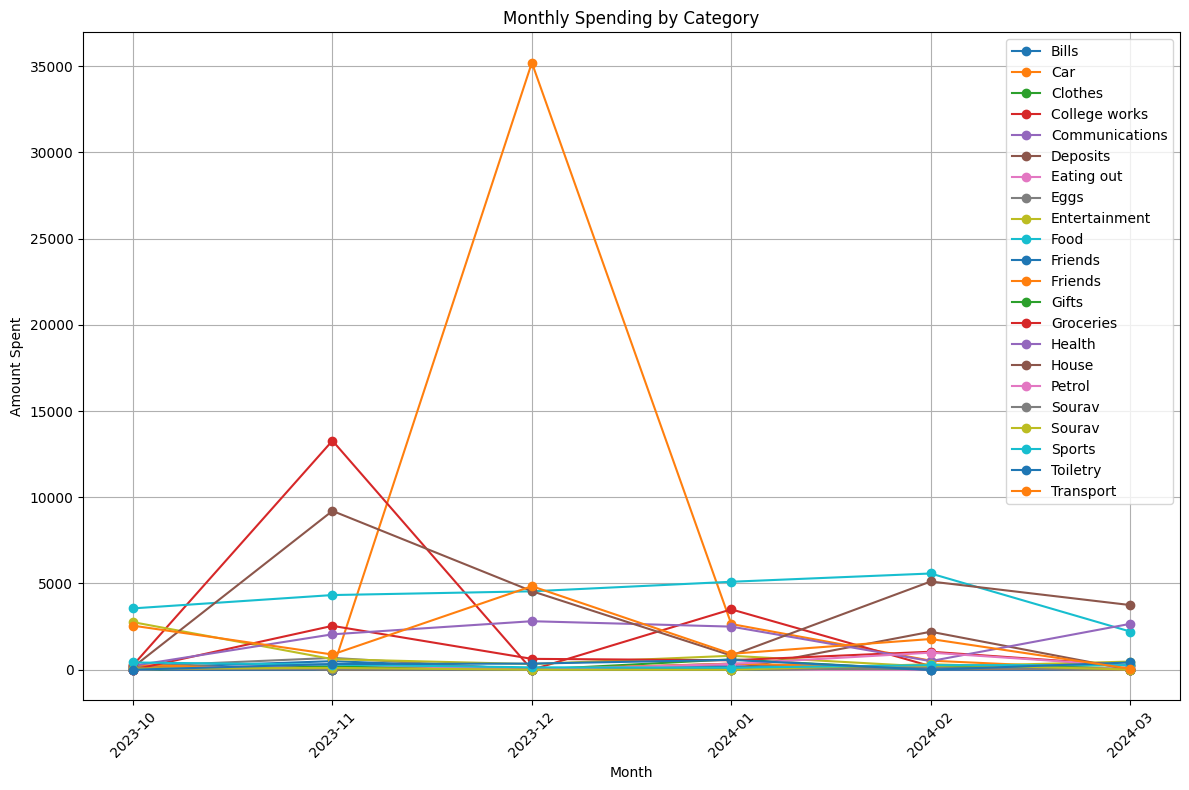

In [17]:
# Pivot the data to have categories as columns and months as rows
pivot_df = df.pivot_table(index='month_year', columns='category', values='amount', aggfunc='sum', fill_value=0)

# Plot the line graph
plt.figure(figsize=(12, 8))

# Plot each category's spending
for category in pivot_df.columns:
    plt.plot(pivot_df.index.astype(str), pivot_df[category], marker='o', label=category)

plt.title('Monthly Spending by Category')
plt.xlabel('Month')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()